# 0. Imports

In [1]:
#math
import numpy as np

#plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# 1. Aerodynamic loads
## 1.1 Aerodynamic data reading

In [2]:
#reading files
aeroload = np.loadtxt('aerodynamicloada320.dat', delimiter=',')

#getting the coordinates for the grid
N_x, N_z = 41, 81
theta_x, theta_z = [], []

#creating thetas for obtaining x and z coordinates
for i in range(0, N_x+1):
    theta_x.append(np.pi*(i-1)/N_x)
for i in range(0, N_z+1):
    theta_z.append(np.pi*(i-1)/N_z)
    
#translating into coordinates
#(0,0,0) is at the upper right corner of the aileron, if LE is facing forward
x_coords, z_coords = [], [] #[m]
l_a, C_a = 2.771, 0.547 #[m]
for i in range(0, N_x):
    x_coords.append((l_a/4) * ((1-np.cos(theta_x[i]))+(1-np.cos(theta_x[i+1]))))
for i in range(0, N_z):
    z_coords.append((-C_a/4) * ((1-np.cos(theta_z[i]))+(1-np.cos(theta_z[i+1]))))
    
#creating a grid from x_coords and z_coords
x_grid, z_grid = np.meshgrid(x_coords, z_coords)


## 1.2 Aerodynamic data plots

<IPython.core.display.Javascript object>


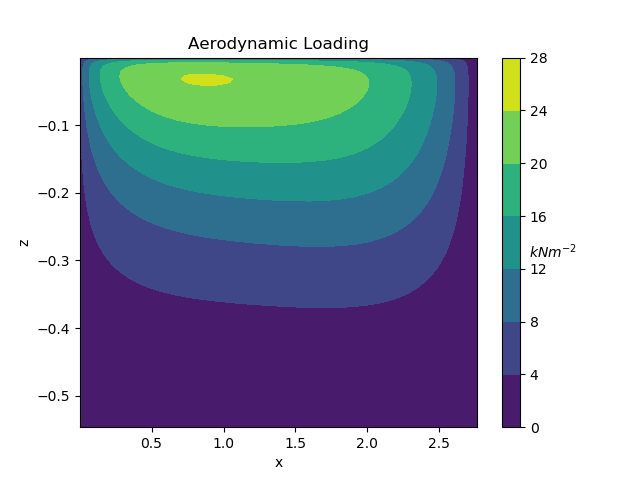

In [3]:
#2D graph for the report, possibly
#(0,0,0) is at the upper right corner of the aileron, if LE is facing forward
fig = plt.figure()
plt.contourf(x_grid,z_grid, aeroload)

plt.title('Aerodynamic Loading')
plt.xlabel('x')
plt.ylabel('z')

plt.colorbar().set_label('$kN  m^{-2}$', rotation = 0 )

plt.show()

<IPython.core.display.Javascript object>


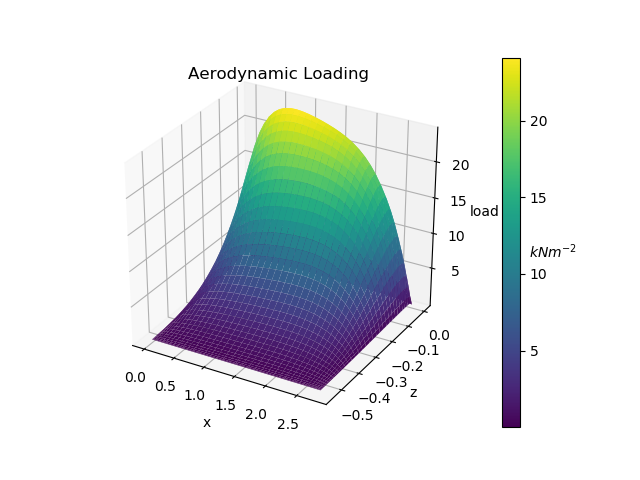

In [4]:
#interactable 3D plot to increase understanding
#(0,0,0) is at the upper right corner of the aileron, if LE is facing forward

#imagine the x-z plane as the BOTTOM of the aileron now, as the aerodynamic
#load points downwards into the x-z plane - hence it is positive in the graph

fig = plt.figure()
ax = plt.axes(projection='3d')
plot = ax.plot_surface(x_grid, z_grid, aeroload, cmap='viridis')

plt.colorbar(plot).set_label('$kN  m^{-2}$', rotation = 0 )
plt.title('Aerodynamic Loading')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('load')


plt.show()